# Pandas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [106]:
sdata=pd.Series([0.25, 0.50, 0.75, 1.0])
print("sdata:\n", sdata)
print("type:",type(sdata))
print("sdata[1]:",sdata[1])
print("sdata.values:",sdata.values)
print("sdata.index:",sdata.index)

sdata:
 0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64
type: <class 'pandas.core.series.Series'>
sdata[1]: 0.5
sdata.values: [0.25 0.5  0.75 1.  ]
sdata.index: RangeIndex(start=0, stop=4, step=1)


In [107]:
sdata=pd.Series([0.25, 0.50, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
print("sdata:\n",sdata)
print("sdata[b]: ",sdata['b'])


sdata:
 a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
sdata[b]:  0.5


In [108]:
sdata=pd.Series([0.25, 0.50, 0.75, 1.0], index=[2, 5, 3, 7])
print("sdata:\n",sdata)
print("sdata[5]: ",sdata[5])


sdata:
 2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64
sdata[5]:  0.5


# Series as a specialized dictionary

In [5]:
population_dict={'California': 38332521,
                 'Texas': 26448163,
                 'New York': 19651127,
                 'Florida': 19552860,
                 'Illinois': 12882135}
print("Population_dict:\n", population_dict) #為排序的series
population=pd.Series(population_dict)
print("#population:\n", population)
print("#Type(population):", type(population))
print("#Population['California']:", population['California'])
print("#Population['Texas':'Florida']:\n", population['Texas':'Florida'])
print("#Population.sort_values():\n", population.sort_values()) #排序後的series

Population_dict:
 {'California': 38332521, 'Texas': 26448163, 'New York': 19651127, 'Florida': 19552860, 'Illinois': 12882135}
#population:
 California    38332521
Texas         26448163
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64
#Type(population): <class 'pandas.core.series.Series'>
#Population['California']: 38332521
#Population['Texas':'Florida']:
 Texas       26448163
New York    19651127
Florida     19552860
dtype: int64
#Population.sort_values():
 Illinois      12882135
Florida       19552860
New York      19651127
Texas         26448163
California    38332521
dtype: int64


In [6]:
# Create Series object using Scalar value
print("#series 5:\n", pd.Series(5, index=[100, 200, 300]))
print("#series 2a,1b,3c:\n", pd.Series({2:'a',1:'b', 3:'c'}, index=[3, 2]))


#series 5:
 100    5
200    5
300    5
dtype: int64
#series 2a,1b,3c:
 3    c
2    a
dtype: object


In [28]:
print("Population:\n", population)
area_dict={'California': 423967,
           'Texas': 695692,
           'New York': 141297,
           'Florida': 170312,
           'Illinois': 149995}
area=pd.Series(area_dict)
states=pd.DataFrame({'population':population,
                    'area':area})
print("\nStates:\n", states)
print("\nstates.index:\n", states.index)
print("states.columns:\n", states.columns)
print("\nstates['area']:\n", states['area'])

Population:
 California    38332521
Texas         26448163
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

States:
             population    area
California    38332521  423967
Texas         26448163  695692
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995

states.index:
 Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')
states.columns:
 Index(['population', 'area'], dtype='object')

states['area']:
 California    423967
Texas         695692
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64


# Constructing DataFrame Objects
- From a single series object
- From a list of dictionaries
- From a dictionary of Series objects
- From a two-dimentional NumPy array
- From a NumPy structured array

In [34]:
print("type of population: ", type(population))
print("type of states: ", type(states))
populationDF=pd.DataFrame(population, columns=['population'])
print("populationDF: \n", populationDF)
print("\ntype of population: ", type(populationDF))


type of population:  <class 'pandas.core.series.Series'>
type of states:  <class 'pandas.core.frame.DataFrame'>
populationDF: 
             population
California    38332521
Texas         26448163
New York      19651127
Florida       19552860
Illinois      12882135

type of population:  <class 'pandas.core.frame.DataFrame'>


In [40]:
#Create the DataFrame From a list of dictionary
data=[{'a':i, 'b':2*i}
    for i in range(3)]
print("data:", data)
print("type of data:", type(data))
print("pd.DataFrame(data):\n", pd.DataFrame(data))
print("type of pd.DataFrame(data):", type(pd.DataFrame(data)))

#DataFrame can handle missing values
print("pd.DataFrame({'a':1, 'b':2},{'b':3, 'c':4}):\n", pd.DataFrame({'a':1, 'b':2},{'b':3, 'c':4}))


data: [{'a': 0, 'b': 0}, {'a': 1, 'b': 2}, {'a': 2, 'b': 4}]
type of data: <class 'list'>
pd.DataFrame(data):
    a  b
0  0  0
1  1  2
2  2  4
type of pd.DataFrame(data): <class 'pandas.core.frame.DataFrame'>
pd.DataFrame({'a':1, 'b':2},{'b':3, 'c':4}):
    a  b
b  1  2
c  1  2


In [45]:
#DataFrame can handle missing values
print("pd.DataFrame({'a':1, 'b':2},{'b':3, 'c':4}):\n", pd.DataFrame({'a':1, 'b':2},{'b':3, 'c':4}))

#Create DataFrame use two-dimentional NumPy array
print("pd.DataFrame(np.random.rand(3, 2)):\n", pd.DataFrame(np.random.rand(3, 2), columns=['foo', 'bar'], index=['a', 'b', 'c']))

#Create an Index from the list of integer
ind=pd.Index([2, 3, 5, 7, 11])
print(ind)
print("ind[1]:", ind[1])
#ind[1]=0 --> TypeError: Index does not support mutable operations

pd.DataFrame({'a':1, 'b':2},{'b':3, 'c':4}):
    a  b
b  1  2
c  1  2
pd.DataFrame(np.random.rand(3, 2)):
         foo       bar
a  0.926434  0.635717
b  0.704050  0.737990
c  0.464303  0.388702
Int64Index([2, 3, 5, 7, 11], dtype='int64')
ind[1]: 3


# Index as ordered set

In [53]:
indA=pd.Index([1, 3, 5, 7, 9])
indB=pd.Index([2, 3, 5, 7, 11])
#indA & indB --> index.intersection(other) instead
print("indA: ", indA)
print("indB: ", indB)
print("intersection: ", indA.intersection(indB))

#indA | indB --> Use index.union(other) instead
print("union: ", indA.union(indB))

#Differences
#indA ^ indB --> index.symmetric_difference(other) instead
print("diiferences: ", indA.symmetric_difference(indB))

indA:  Int64Index([1, 3, 5, 7, 9], dtype='int64')
indB:  Int64Index([2, 3, 5, 7, 11], dtype='int64')
intersection:  Int64Index([3, 5, 7], dtype='int64')
union:  Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')
diiferences:  Int64Index([1, 2, 9, 11], dtype='int64')


# Data Indexing and Selection
- Series as dictionary

In [62]:
data=pd.Series([0.25, 0.50, 0.75, 1.00], index=['a', 'b', 'c', 'd'])
print("data:\n", data)
print("\n\'a\' in data: ", 'a' in data)
print("data.key(): ", data.keys())
print("list(data.items()): ", list(data.items()))
data['e']=1.25 #add element
print("\ndata: \n", data)


data:
 a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

'a' in data:  True
data.key():  Index(['a', 'b', 'c', 'd'], dtype='object')
list(data.items()):  [('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

data: 
 a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64


In [66]:
#Slicing using explicit indexing
print("data['a':'c']:\n", data['a':'c'])

#Slicing using implicit indexing
print("\ndata[0:2]:\n", data[0:2])

print("\ndata:\n", data)


data['a':'c']:
 a    0.25
b    0.50
c    0.75
dtype: float64

data[0:2]:
 a    0.25
b    0.50
dtype: float64

data:
 a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64


In [70]:
#Masking
print("data[(data>0.3)&(data<0.8)]: \n", data[(data>0.3)&(data<0.8)])

#Fancy Indexing, list of indices Fancy Indexing 指傳遞索引陣列以便一次得到多個陣列元素。
#https://medium.com/allen%E7%9A%84%E6%8A%80%E8%A1%93%E7%AD%86%E8%A8%98/python-numpy-fancy-indexing-ff1ac286d671
print("\ndata[['a', 'd']]: \n", data[['a', 'd']])

#Index

data[(data>0.3)&(data<0.8)]: 
 b    0.50
c    0.75
dtype: float64

data[['a', 'd']]: 
 a    0.25
d    1.00
dtype: float64


# Indexer loc and iloc

In [79]:
data=pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
print("data:\n", data)

#to access data using index it using explicit indexing
print("data[1]:", data[1])
#to access data using slicing it uses implicit indexing
print("data[1:3]:\n", data[1:3])
#loc uses explicit(明顯的) indexing
print("\ndata.loc[1]: ", data.loc[1])
#iloc uses implicit(隱晦的) indexing
print("data.iloc[1]: ", data.iloc[1])

data:
 1    a
3    b
5    c
dtype: object
data[1]: a
data[1:3]:
 3    b
5    c
dtype: object

data.loc[1]:  a
data.iloc[1]:  b


# Data selection in DataFrame
## DataFrame as a dictionary

In [21]:
pop=pd.Series({'California': 38332521,
                'Texas': 26448163,
                'New York': 19651127,
                'Florida': 19552860,
                'Illinois': 12882135})

area=pd.Series({'California': 423967,
                'Texas': 695692,
                'New York': 141297,
                'Florida': 170312,
                'Illinois': 149995})

data=pd.DataFrame({'area':area,
                    'pop':pop})

print("data:\n", data)



data:
               area       pop
California  423967  38332521
Texas       695692  26448163
New York    141297  19651127
Florida     170312  19552860
Illinois    149995  12882135


In [23]:
#Dictionary style indexing  
print("area:\n", data['area'])

#attribute style
print("\ndata.area:\n", data.area)

#are we getting the same data from using different methods
print("\ndata.area is data['area']:", data.area is data['area'])



area:
 California    423967
Texas         695692
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

data.area:
 California    423967
Texas         695692
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

data.area is data['area']: True


In [24]:
print("\ndata.pop:\n", data.pop)
print("\ndata['pop']:\n", data['pop'])
print("\ndata.pop is data['pop']:", data.pop is data['pop'])


data.pop:
 <bound method DataFrame.pop of               area       pop
California  423967  38332521
Texas       695692  26448163
New York    141297  19651127
Florida     170312  19552860
Illinois    149995  12882135>

data['pop']:
 California    38332521
Texas         26448163
New York      19651127
Florida       19552860
Illinois      12882135
Name: pop, dtype: int64

data.pop is data['pop']: False


In [25]:
# data.pop => avoid using attribute style indexing to modify the value
data['pop']
data['density']=data['pop']/data['area']
print("data:\n", data)

#to get the values of DataFrame
print("data.values:\n", data.values)

#to  get the first row of the dataframe
print("data.values[0]:\n", data.values[0])





data:
               area       pop     density
California  423967  38332521   90.413926
Texas       695692  26448163   38.017058
New York    141297  19651127  139.076746
Florida     170312  19552860  114.806121
Illinois    149995  12882135   85.883763
data.values:
 [[4.23967000e+05 3.83325210e+07 9.04139261e+01]
 [6.95692000e+05 2.64481630e+07 3.80170578e+01]
 [1.41297000e+05 1.96511270e+07 1.39076746e+02]
 [1.70312000e+05 1.95528600e+07 1.14806121e+02]
 [1.49995000e+05 1.28821350e+07 8.58837628e+01]]
data.values[0]:
 [4.23967000e+05 3.83325210e+07 9.04139261e+01]


In [26]:
#Slicing using implicit indexing
print("data.iloc[:3, :2]:\n", data.iloc[:3, :2])

#Explicit  index includes the final index
print("data.loc[:'Illinois', :'pop']:\n", data.loc[:'Illinois', :'pop'])

print("data.loc[:'Florida', :'density']:\n", data.loc[:'Florida', :'density'])

data.iloc[:3, :2]:
               area       pop
California  423967  38332521
Texas       695692  26448163
New York    141297  19651127
data.loc[:'Illinois', :'pop']:
               area       pop
California  423967  38332521
Texas       695692  26448163
New York    141297  19651127
Florida     170312  19552860
Illinois    149995  12882135
data.loc[:'Florida', :'density']:
               area       pop     density
California  423967  38332521   90.413926
Texas       695692  26448163   38.017058
New York    141297  19651127  139.076746
Florida     170312  19552860  114.806121


In [29]:
#loc and iloc can combine masking and fancy indexing
print("#combination: \n", data.loc[data.density>100, ['pop', 'density']])
print("#data:\n", data)

#Modify DataFrame using iloc
data.iloc[0,2]=90
print("#modified data:\n", data)

#swap columns and rows using transpose()
#https://note.nkmk.me/en/python-pandas-t-transpose/
print("#Swap:\n", data.transpose())



#combination: 
                pop     density
New York  19651127  139.076746
Florida   19552860  114.806121
#data:
               area       pop     density
California  423967  38332521   90.000000
Texas       695692  26448163   38.017058
New York    141297  19651127  139.076746
Florida     170312  19552860  114.806121
Illinois    149995  12882135   85.883763
#modified data:
               area       pop     density
California  423967  38332521   90.000000
Texas       695692  26448163   38.017058
New York    141297  19651127  139.076746
Florida     170312  19552860  114.806121
Illinois    149995  12882135   85.883763
#Swap:
          California         Texas      New York       Florida      Illinois
area       423967.0  6.956920e+05  1.412970e+05  1.703120e+05  1.499950e+05
pop      38332521.0  2.644816e+07  1.965113e+07  1.955286e+07  1.288214e+07
density        90.0  3.801706e+01  1.390767e+02  1.148061e+02  8.588376e+01


# Operating on Data in Pandas

In [30]:
#Series
rng=np.random.RandomState(42)
ser=pd.Series(rng.randint(0, 10, 4))
print("#ser:\n", ser)

#DataFrame
df=pd.DataFrame(rng.randint(0, 10,(3, 4)), columns=['a', 'b', 'c', 'd'])
print("#df:\n", df)

#Index preserve in Series offer applying NumPy operation
#以自然常数e为底的指数函数: https://blog.csdn.net/Ericsson_Liu/article/details/81271021
print("#exp(ser):\n", np.exp(ser))

#Index preserves in DataFrame
print("#sin(df*np.pi/4):\n", np.sin(df*np.pi/4))


#ser:
 0    6
1    3
2    7
3    4
dtype: int32
#df:
    a  b  c  d
0  6  9  2  6
1  7  4  3  7
2  7  2  5  4
#exp(ser):
 0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64
#sin(df*np.pi/4):
           a             b         c             d
0 -1.000000  7.071068e-01  1.000000 -1.000000e+00
1 -0.707107  1.224647e-16  0.707107 -7.071068e-01
2 -0.707107  1.000000e+00 -0.707107  1.224647e-16


# Indexing Alignment in Series

In [32]:
area=pd.Series({'Alaska':1723337,
                'Texas': 695692,
                'California': 423967
                })
print("#area:\n", area)
population=pd.Series({'California': 38332521,
                'Texas': 26448193,
                'New York':19651127
                })
print("\n#population:\n", population)
print("\n#area/population:\n", area/population)
print("\n#area.index.union(population.index):\n", area.index.union(population.index))

#area:
 Alaska        1723337
Texas          695692
California     423967
dtype: int64

#population:
 California    38332521
Texas         26448193
New York      19651127
dtype: int64

#area/population:
 Alaska             NaN
California    0.011060
New York           NaN
Texas         0.026304
dtype: float64

#area.index.union(population.index):
 Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')


# Index Alignment in DataFrame

In [3]:
rng=np.random.RandomState(42)
A=pd.DataFrame(rng.randint(0, 20, (2, 2)), columns=list('xy'))
print("#A:\n", A)
B=pd.DataFrame(rng.randint(0, 10, (3, 3)), columns=list('xyz'))
print("\n#B:\n", B)
print("\n#A+B:\n", A+B)



#A:
     x   y
0   6  19
1  14  10

#B:
    x  y  z
0  7  4  6
1  9  2  6
2  7  4  3

#A+B:
       x     y   z
0  13.0  23.0 NaN
1  23.0  12.0 NaN
2   NaN   NaN NaN


In [6]:
#pd.stack(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html
#np.stack(): https://numpy.org/doc/stable/reference/generated/numpy.stack.html
fill=A.stack().mean() #所有A內的數值相加取平均
print("\n#fill:\n", fill)
print("\n#A.add(B, fill_value=fill):\n", A.add(B, fill_value=fill)) #fill_value:補A中為Nan的數字，填補上A的平均
print("\n#B:\n", B)


#fill:
 12.25

#A.add(B, fill_value=fill):
        x      y      z
0  13.00  23.00  18.25
1  23.00  12.00  18.25
2  19.25  16.25  15.25

#B:
    x  y  z
0  7  4  6
1  9  2  6
2  7  4  3


# Operations Between Series and DataFrame
- Operations between Series and DataFrame are similar as operations between one-dimentional and two-dimentional array

In [9]:
rng= np.random.RandomState(42)
A= rng.randint(10, size=(3, 4))
print("\n#A:\n", A)
print("\n#A[0]: \n", A[0])
print("\n#A-A[0]:\n", A-A[0]) #每一row皆減A[0]


#A:
 [[6 3 7 4]
 [6 9 2 6]
 [7 4 3 7]]

#A[0]: 
 [6 3 7 4]

#A-A[0]:
 [[ 0  0  0  0]
 [ 0  6 -5  2]
 [ 1  1 -4  3]]


In [10]:
#Create DataFrame
df=pd.DataFrame(A, columns=list('QRST'))
print("#df:\n", df)
print("\n#df.iloc[0]:\n", df.iloc[0])

#By default the operation is done row-wise
print("\n#df-df.iloc[0]:\n", df-df.iloc[0])



#df:
    Q  R  S  T
0  6  3  7  4
1  6  9  2  6
2  7  4  3  7

#df.iloc[0]:
 Q    6
R    3
S    7
T    4
Name: 0, dtype: int32

#df-df.iloc[0]:
    Q  R  S  T
0  0  0  0  0
1  0  6 -5  2
2  1  1 -4  3


In [13]:
#Substracting one of the column elements to rest of the columm elements
print("#df:\n", df)
print("\n#df.subtract(df['R'], axis=0):\n", df.subtract(df['R'], axis=0)) #每一column減掉df['R']那一column的值

#Substracting one element of a column to rest of the elements in column
halfrow = df.iloc[0, ::2]
print("\n#halfrow:\n", halfrow)
print("#df:\n", df)
print("\n#df-halfrow:\n", df-halfrow) #Q column-6, S column-7, others turn into Nan 

#df:
    Q  R  S  T
0  6  3  7  4
1  6  9  2  6
2  7  4  3  7

#df.subtract(df['R'], axis=0):
    Q  R  S  T
0  3  0  4  1
1 -3  0 -7 -3
2  3  0 -1  3

#halfrow:
 Q    6
S    7
Name: 0, dtype: int32
#df:
    Q  R  S  T
0  6  3  7  4
1  6  9  2  6
2  7  4  3  7

#df-halfrow:
      Q   R    S   T
0  0.0 NaN  0.0 NaN
1  0.0 NaN -5.0 NaN
2  1.0 NaN -4.0 NaN


# Operating on Null Values (Pandas 處理缺失值: https://www.796t.com/content/1544495051.html)
- Pandas provide seceral useful functions for detecting, removing and replacing null values.
- isnull() #generates the boolean mask indicating missing values. Show 'none' is true, others are false.
- notnull() #opposite of isnull(). Show 'none' is false, others are true.   
- fillna() #missing values filled. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html


## Detecting Null Values

In [109]:
data=pd.Series([2, np.nan, 'hello', None]) #np.nan=none value
print("#data: \n", data)
print("\n#data.isnull: \n", data.isnull())

#data: 
 0        2
1      NaN
2    hello
3     None
dtype: object

#data.isnull: 
 0    False
1     True
2    False
3     True
dtype: bool


- fillter out the null values

In [110]:
print("#data: \n", data)
print("\n#data[data.notnull()]: \n", data[data.notnull()])

#Removal of NA values for series
#pd.dropna()(按行刪除:存在空值則刪除該行): https://blog.csdn.net/qq_17753903/article/details/89817371
ser1=data.dropna()
print("\n#ser1: \n", ser1)



#data: 
 0        2
1      NaN
2    hello
3     None
dtype: object

#data[data.notnull()]: 
 0        2
2    hello
dtype: object

#ser1: 
 0        2
2    hello
dtype: object


# Operating on DataFrames

In [117]:
df=pd.DataFrame([[1, np.nan, 2], 
                [2, 3, 5],
                [np.nan, 4, 6]])
print("\n#df:\n", df)
print("\n#df.dropna(axis='columns'):\n", df.dropna(axis='columns')) #移除column中有nan的column

#Creating the nan value column
df[3]=np.NaN
print("\n#df:\n", df)
print("\n#df.dropna(axis='columns', how='all'):\n", df.dropna(axis='columns', how='all')) #how='all=整個column都是nan才刪除，how='any'=有一個nan則整個column刪除

#Specifying the minimum number we want to keep to remove Nan
print("\n#df.dropna(axis='rows', thresh=3):\n", df.dropna(axis='rows', thresh=3)) #axis中至少有thresh個非缺失值，否則刪除


#df:
      0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6

#df.dropna(axis='columns'):
    2
0  2
1  5
2  6

#df:
      0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN

#df.dropna(axis='columns', how='all'):
      0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6

#df.dropna(axis='rows', thresh=3):
      0    1  2   3
1  2.0  3.0  5 NaN


# Filling Null Values

In [118]:
data=pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
print("#data:\n", data)
print("\n#data.fillna(0):\n", data.fillna(0)) #缺失的部分填0


#data:
 a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

#data.fillna(0):
 a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64


In [121]:
#forward fill: 取前面一個的值補缺失值
print("\n#data.fillna(method='ffill'):\n", data.fillna(method='ffill'))
#Backward fill: 取後面一個的值補缺失值
print("\n#data.fillna(method='bfill'):\n", data.fillna(method='bfill'))
print("\n#df:\n", df)
print("\n#data.fillna(method='ffill', axis=1):\n", df.fillna(method='ffill', axis=1)) #???變形的很嚴重，從一維變二維，value如何組成?column=abcd還在嗎?


#data.fillna(method='ffill'):
 a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

#data.fillna(method='bfill'):
 a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

#df:
      0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN

#data.fillna(method='ffill', axis=1):
      0    1    2    3
0  1.0  1.0  2.0  2.0
1  2.0  3.0  5.0  5.0
2  NaN  4.0  6.0  6.0


In [99]:
A1 = pd.DataFrame([[12, np.nan, 23, 25 ],
                   [18, None, 52, 34 ],
                   [np.nan, 14, 39, None],
                   [37, 76, 19, 10 ],
                   [47, 66, 29, 1 ]],
                 columns=list('ABCD'))
print("#A1:\n", A1)
# Replace all NaN elements in column 'A', 'B', 'C', and 'D', with 0, 1, 2, and 3 respectively.
# hint (use value parameter)
values={'A':0, 'B':1, 'C':2, 'D':3}
print("\n#A1.fillna(value=values):\n", A1.fillna(value=values))
# Only replace the first NaN element. by default it is column-wise. (hint: use value and limit parameters)
print("\n#A1.fillna(value=values, limit=1):\n", A1.fillna(value=values, limit=1))

#A1:
       A     B   C     D
0  12.0   NaN  23  25.0
1  18.0   NaN  52  34.0
2   NaN  14.0  39   NaN
3  37.0  76.0  19  10.0
4  47.0  66.0  29   1.0

#A1.fillna(value=values):
       A     B   C     D
0  12.0   1.0  23  25.0
1  18.0   1.0  52  34.0
2   0.0  14.0  39   3.0
3  37.0  76.0  19  10.0
4  47.0  66.0  29   1.0

#A1.fillna(value=values, limit=1):
       A     B   C     D
0  12.0   1.0  23  25.0
1  18.0   NaN  52  34.0
2   0.0  14.0  39   3.0
3  37.0  76.0  19  10.0
4  47.0  66.0  29   1.0


# Hierarchical Indexing
## Multiple Indexed Series

In [5]:
#Using Python Tuples as Keys
index= [('California', 2000), ('California', 2010),
        ('New York', 2000), ('New York', 2010),
        ('Texas', 2000), ('Texas', 2010)]
population=[33871648, 37253956,
            18976457, 19378102,
            20851820, 25145561]
pop=pd.Series(population, index=index)
print("#pop:\n", pop)
print("\n#pop of limited range:\n", pop[('New York', 2000):('Texas', 2010)])



#pop:
 (California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

#pop of limited range:
 (New York, 2000)    18976457
(New York, 2010)    19378102
(Texas, 2000)       20851820
(Texas, 2010)       25145561
dtype: int64


In [6]:
#Converting python tuple multi-index into pandas multi-index
index=pd.MultiIndex.from_tuples(index)
print("#index:\n", index)
pop=pop.reindex(index) #reindex():為series和dataframe新增或者刪除索引 (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html)(https://www.796t.com/content/1541815990.html)
print("\n#pop :\n", pop)



#index:
 MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

#pop :
 California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64


In [9]:
#pop.sort_index(level=1) #依照哪一level排序，如果level=1，按照2000、2010排序
print("#pop['New York':'Texas']:\n ", pop['New York':'Texas']) 
print("\n#pop[:, 2000]:\n ", pop[:, 2000])

#pop['New York':'Texas']:
  New York  2000    18976457
          2010    19378102
Texas     2000    20851820
          2010    25145561
dtype: int64

#pop[:, 2000]:
  California    33871648
New York      18976457
Texas         20851820
dtype: int64


In [10]:
#Converting Multi-index series into indexed dataframe using unstack()
pop_df=pop.unstack() #將column旋轉成row: https://www.796t.com/content/1545044287.html -->unstack(), stack()
print(pop_df)

                2000      2010
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561


In [11]:
# What if we want to add another column of demographic data (under 18)
pop_df=pd.DataFrame({'total':pop, 
                    'under18':[9267089, 9284094,
                                4687371, 4318033,
                                4506301, 6879014]})
print(pop_df)

                    total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687371
           2010  19378102  4318033
Texas      2000  20851820  4506301
           2010  25145561  6879014


In [84]:
f_u18=pop_df['under18']/pop_df['total']
print(f_u18.unstack())

                2000      2010
New York    0.247010  0.222831
Texas       0.216111  0.273568
california  0.273594  0.249211


# Method of MultiIndex Creation
- List
- Dictionary
- Multi-index constructors

## Creating multi-index by List

In [56]:
df=pd.DataFrame(np.random.rand(4, 2),
                index=[['a','a', 'b', 'b'], [1, 2, 1, 2]],
                columns=['data1', 'data2'])
print(df)

        data1     data2
a 1  0.845263  0.139924
  2  0.819029  0.620109
b 1  0.682283  0.539753
  2  0.733428  0.640809


In [58]:
data={('california', 2000):33871648,
        ('california', 2010):37253956,
        (  'New York', 2000):18976457,
        (  'New York', 2010):19378102,
        (     'Texas', 2000):20851820,
        (     'Texas', 2010):25145561}
print("#data:\n", data)
print("\n#pd.Series(data):\n", pd.Series(data))

#data:
 {('california', 2000): 33871648, ('california', 2010): 37253956, ('New York', 2000): 18976457, ('New York', 2010): 19378102, ('Texas', 2000): 20851820, ('Texas', 2010): 25145561}

#pd.Series(data):
 california  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64


## Explicit Multi-index Constructor

In [59]:
#from the list of arrays
print(pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]]))
#from the list of tuples
print(pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)]))
#From a cartesian product of single series
print(pd.MultiIndex.from_product([['a', 'b'],[1, 2]]))

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )
MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )
MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )


## MultiIndex level names

In [61]:
print("#pop:\n", pop)
pop.index.names=['state', 'year']
print("\n#pop:\n", pop)

#pop:
 state       year
california  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

#pop:
 state       year
california  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64


## MultiIndex for Columns

In [14]:
#Creating medical data
#Hierarchical indices and columns
index=pd.MultiIndex.from_product([[2013, 2014],[1,2]], 
                                names=['year', 'visit'])
columns=pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'],
                                    ['Heart_Rate', 'Temperature']],
                                    names=['patient', 'measurement'])
#Create some data
#numpy.round_(arr, decimals = 0, out = None):四捨五入到小數後第decimals位(https://tzzsmaster.blog.csdn.net/article/details/80775256?spm=1001.2101.3001.6650.1&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-80775256-blog-108867547.t0_edu_mix&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-80775256-blog-108867547.t0_edu_mix&utm_relevant_index=2)
#np.random.randn(4, 6):隨機取得4*6的一串數字(https://ithelp.ithome.com.tw/articles/10195984)
data=np.round(np.random.randn(4, 6), 1) #round of 1(四捨五入到小數後第一位), np.round():將數組四捨五入到給定的小數位數。
print("#original data:\n", data)
data[:, ::2]*=10
print("\n#data[:, ::2]*=10:\n", data)
data+=37
print("\n#data+=37:\n", data)
print("\n#abs(data):\n", abs(data)) #絕對值


#original data:
 [[ 1.4  1.7  0.9 -0.4  1.8  1.2]
 [-0.9  1.6 -0.1 -0.2 -0.7  0.6]
 [ 1.5  0.3 -0.1 -1.2  0.6 -0.2]
 [-0.   0.6 -0.6  0.6  0.  -1. ]]

#data[:, ::2]*=10:
 [[14.   1.7  9.  -0.4 18.   1.2]
 [-9.   1.6 -1.  -0.2 -7.   0.6]
 [15.   0.3 -1.  -1.2  6.  -0.2]
 [-0.   0.6 -6.   0.6  0.  -1. ]]

#data+=37:
 [[51.  38.7 46.  36.6 55.  38.2]
 [28.  38.6 36.  36.8 30.  37.6]
 [52.  37.3 36.  35.8 43.  36.8]
 [37.  37.6 31.  37.6 37.  36. ]]

#abs(data):
 [[51.  38.7 46.  36.6 55.  38.2]
 [28.  38.6 36.  36.8 30.  37.6]
 [52.  37.3 36.  35.8 43.  36.8]
 [37.  37.6 31.  37.6 37.  36. ]]


In [15]:
#Create the DataFrame 
health_data=pd.DataFrame(data, index=index, columns=columns)
health_data

patient            Bob                  Guido                    Sue  \
measurement Heart_Rate Temperature Heart_Rate Temperature Heart_Rate   
year visit                                                             
2013 1            51.0        38.7       46.0        36.6       55.0   
     2            28.0        38.6       36.0        36.8       30.0   
2014 1            52.0        37.3       36.0        35.8       43.0   
     2            37.0        37.6       31.0        37.6       37.0   

patient                  
measurement Temperature  
year visit               
2013 1             38.2  
     2             37.6  
2014 1             36.8  
     2             36.0

In [16]:
#Access the data of a person
health_data['Guido']

measurement  Heart_Rate  Temperature
year visit                          
2013 1             46.0         36.6
     2             36.0         36.8
2014 1             36.0         35.8
     2             31.0         37.6

In [17]:
#Access the data of a person from a particular year
health_data.loc[2013, 'Guido']

measurement,Heart_Rate,Temperature
visit,,
1,46.0,36.6
2,36.0,36.8


In [18]:
#Recover patient heart rate 
print("#health_data['Guido', 'Heart_Rate']:\n", health_data['Guido', 'Heart_Rate'])
#Access first two rows and first four columns
print("\n#health_data.iloc[:2, :4]:\n", health_data.iloc[:2, :4])
#Recover patient heart rate of Guido using slicing
print("\n#health_data.loc[:, ('Guido', 'Heart_Rate')]:\n", health_data.loc[:, ('Guido', 'Heart_Rate')])


#health_data['Guido', 'Heart_Rate']:
 year  visit
2013  1        46.0
      2        36.0
2014  1        36.0
      2        31.0
Name: (Guido, Heart_Rate), dtype: float64

#health_data.iloc[:2, :4]:
 patient            Bob                  Guido            
measurement Heart_Rate Temperature Heart_Rate Temperature
year visit                                               
2013 1            51.0        38.7       46.0        36.6
     2            28.0        38.6       36.0        36.8

#health_data.loc[:, ('Guido', 'Heart_Rate')]:
 year  visit
2013  1        46.0
      2        36.0
2014  1        36.0
      2        31.0
Name: (Guido, Heart_Rate), dtype: float64


In [19]:
#Access the heart rate of all patients first visit using tuple of multiple indices
print(health_data.loc([(:, 1),(:, 'Heart_Rate')])) #無法運行

SyntaxError: invalid syntax (525274298.py, line 2)

In [20]:
#要跳過level 1，直接索引level 2，必須用pd.IndexSlice
# IndexSlice:https://pandas.pydata.org/docs/reference/api/pandas.IndexSlice.html
idx=pd.IndexSlice
print("#idx[:, 1], idx[:, 'Heart_Rate']:\n", health_data.loc[idx[:, 1], idx[:, 'Heart_Rate']])
#Access the heart rate of Bob's first visit in 2014 using IndexSlice
print("\n#idx[2014, 1], idx['Bob', 'Heart_Rate']:\n", health_data.loc[idx[2014, 1], idx['Bob', 'Heart_Rate']])
#Access the heart rate and temperature of Bob and Sue's first visit in 2014 using IndexSlice
print("\n#idx[2014, 1], idx[['Bob', 'Sue'], 'Heart_Rate':'Temperature']:\n", health_data.loc[idx[2014, 1], idx[['Bob', 'Sue'], 'Heart_Rate':'Temperature']])


#idx[:, 1], idx[:, 'Heart_Rate']:
 patient            Bob      Guido        Sue
measurement Heart_Rate Heart_Rate Heart_Rate
year visit                                  
2013 1            51.0       46.0       55.0
2014 1            52.0       36.0       43.0

#idx[2014, 1], idx['Bob', 'Heart_Rate']:
 52.0

#idx[2014, 1], idx[['Bob', 'Sue'], 'Heart_Rate':'Temperature']:
 patient  measurement
Bob      Heart_Rate     52.0
         Temperature    37.3
Sue      Heart_Rate     43.0
         Temperature    36.8
Name: (2014, 1), dtype: float64


## Data Aggregation on Multi-Indices


In [21]:
health_data


patient            Bob                  Guido                    Sue  \
measurement Heart_Rate Temperature Heart_Rate Temperature Heart_Rate   
year visit                                                             
2013 1            51.0        38.7       46.0        36.6       55.0   
     2            28.0        38.6       36.0        36.8       30.0   
2014 1            52.0        37.3       36.0        35.8       43.0   
     2            37.0        37.6       31.0        37.6       37.0   

patient                  
measurement Temperature  
year visit               
2013 1             38.2  
     2             37.6  
2014 1             36.8  
     2             36.0

In [91]:
#Average out the measurement in the two visits each year
data_mean=health_data.mean(level='year') #row wise aggregation :2013年中2次測驗的平均、2014年中2次測驗的平均
data_mean

C:\Users\hsian\AppData\Local\Temp\ipykernel_16032\2165935445.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean=health_data.mean(level='year') #row wise aggregation :2013年中2次測驗的平均、2014年中2次測驗的平均


patient            Bob                  Guido                    Sue  \
measurement Heart_Rate Temperature Heart_Rate Temperature Heart_Rate   
year                                                                   
2013              39.0       36.50       40.5       36.95       42.5   
2014              29.5       37.55       32.5       37.00       36.0   

patient                  
measurement Temperature  
year                     
2013              36.25  
2014              36.15

In [93]:
data_mean.mean(axis=1, level='measurement') #(2013年中2次測驗的平均、2014年中2次測驗的平均)中3人心律的平均和溫度的平均

C:\Users\hsian\AppData\Local\Temp\ipykernel_16032\705563473.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean.mean(axis=1, level='measurement') #(2013年中2次測驗的平均、2014年中2次測驗的平均)中3人心率的平均和溫度的平均


measurement,Heart_Rate,Temperature
year,,
2013,40.666667,36.566667
2014,32.666667,36.900000


In [102]:
patient_mean=health_data.mean(axis=1, level='patient') #3人分別的(心律和溫度)的平均，如果沒有axis=1，一般預設的axis=0
patient_mean

C:\Users\hsian\AppData\Local\Temp\ipykernel_16032\1635359805.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  patient_mean=health_data.mean(axis=1, level='patient') #3人分別的(心律和溫度)的平均，如果沒有axis=1，一般預設的axis=0


patient       Bob  Guido    Sue
year visit                     
2013 1      40.65  35.60  42.20
     2      34.85  41.85  36.55
2014 1      30.80  34.85  42.30
     2      36.25  34.65  29.85

## Combining Datasets: Concatenate

In [94]:
# one dimesional array
x=[1, 2, 3]
y=[4, 5, 6]
z=[7, 8, 9]
print("#[x, y, z]:\n", np.concatenate([x, y, z]))
#two dimentional array
x=[[1, 2], [3, 4]]
print("\n#[x, x], axis=1:\n", np.concatenate([x, x], axis=1))


#[x, y, z]:
 [1 2 3 4 5 6 7 8 9]

#[x, x], axis=1:
 [[1 2 1 2]
 [3 4 3 4]]


## Concatenation in Series and DataFrame
- pd.concat()

### Series

In [107]:
ser1=pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2=pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
print("#pd.concat([ser1, ser2])\n", pd.concat([ser1, ser2]))

s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
print("\n#pd.concat([s1, s2])\n", pd.concat([s1, s2]))
#Clear the existing index and reset it in the result by setting the ignore_index option to True.(index重新排序)
print("\n#pd.concat([s1, s2], ignore_index=True)\n", pd.concat([s1, s2], ignore_index=True))


#pd.concat([ser1, ser2])
 1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

#pd.concat([s1, s2])
 0    a
1    b
0    c
1    d
dtype: object

#pd.concat([s1, s2], ignore_index=True)
 0    a
1    b
2    c
3    d
dtype: object


In [106]:
#Add a hierarchical index at the outermost level of the data with the keys option.(增加series的level)
print("\n#pd.concat([s1, s2], keys=['s1', 's2'])\n", pd.concat([s1, s2], keys=['s1', 's2']))
#Label the index keys you create with the names option.
print("\n#pd.concat([s1, s2], keys=['s1', 's2'],names=['Series name', 'Row ID'])\n", pd.concat([s1, s2], keys=['s1', 's2'], names=['Series name', 'Row ID']))



#pd.concat([s1, s2], keys=['s1', 's2'])
 s1  0    a
    1    b
s2  0    c
    1    d
dtype: object

#pd.concat([s1, s2], keys=['s1', 's2'],names=['Series name', 'Row ID'])
 Series name  Row ID
s1           0         a
             1         b
s2           0         c
             1         d
dtype: object


### DataFrame

In [2]:
#Create the Data for DataFrame
df1=pd.DataFrame(np.arange(0, 9).reshape(3, 3), 
                index=[1, 2, 3],
                columns=['a', 'b', 'c'])
print("\n#df1\n", df1)
df2=pd.DataFrame(np.arange(9, 18).reshape(3, 3), 
                index=[4, 5, 6],
                columns=['a', 'b', 'c'])
print("\n#df2\n", df2)

#Combining two dataframe
print("\n#pd.concat([df1, df2])\n", pd.concat([df1, df2]))


#df1
    a  b  c
1  0  1  2
2  3  4  5
3  6  7  8

#df2
     a   b   c
4   9  10  11
5  12  13  14
6  15  16  17

#pd.concat([df1, df2])
     a   b   c
1   0   1   2
2   3   4   5
3   6   7   8
4   9  10  11
5  12  13  14
6  15  16  17


In [3]:
df3=pd.DataFrame(np.arange(18, 27).reshape(3, 3), 
                index=[1, 2, 3],
                columns=['d', 'e', 'f'])
print("#df3\n", df3)
#Combine two dataframe column wise
print("\n#pd.concat([df1, df3], axis=1)\n", pd.concat([df1, df3], axis=1))


#df3
     d   e   f
1  18  19  20
2  21  22  23
3  24  25  26

#pd.concat([df1, df3], axis=1)
    a  b  c   d   e   f
1  0  1  2  18  19  20
2  3  4  5  21  22  23
3  6  7  8  24  25  26


##### What if we have duplicate indices

In [7]:
#Create a dataframe
df4= pd.DataFrame(np.arange(9,18).reshape(3,3),
                    index=[1, 2, 3],
                    columns=['a', 'b', 'c']
                    )
#concat row wise
print("#concat([df1, df4]):\n", pd.concat([df1, df4]))

#concat column wise
print("\n#concat([df1, df4], axis=1):\n", pd.concat([df1, df4], axis=1))





#concat([df1, df4]):
     a   b   c
1   0   1   2
2   3   4   5
3   6   7   8
1   9  10  11
2  12  13  14
3  15  16  17

#concat([df1, df4], axis=1):
    a  b  c   a   b   c
1  0  1  2   9  10  11
2  3  4  5  12  13  14
3  6  7  8  15  16  17


In [6]:
#If we want to ignore ???lose
print("\n#concat([df1, df4], ignore_index=True):\n", pd.concat([df1, df4], ignore_index=True)) #ignore_index=True: 重新排列

#We want to specify the Label for data source
print("\n#concat([df1, df4], keys=['df1', 'df4']):\n", pd.concat([df1, df4], keys=['df1', 'df4']))



#concat([df1, df4], ignore_index=True):
     a   b   c
0   0   1   2
1   3   4   5
2   6   7   8
3   9  10  11
4  12  13  14
5  15  16  17

#concat([df1, df4], keys=['df1', 'df4']):
         a   b   c
df1 1   0   1   2
    2   3   4   5
    3   6   7   8
df4 1   9  10  11
    2  12  13  14
    3  15  16  17


In [10]:
#Combine data where some of the columns are common
df5=pd.DataFrame(np.arange(27, 36).reshape(3, 3),
                index=[4, 5, 6],
                columns=['b', 'c', 'd'])
print("#df5:\n", df5)
print("\n#concat([df1, df5]):\n", pd.concat([df1, df5]))

#performing intersection / or getting the output where columns are same
print("\n#concat([df1, df5], join='inner'):\n", pd.concat([df1, df5], join='inner')) #inner???


#df5:
     b   c   d
4  27  28  29
5  30  31  32
6  33  34  35

#concat[df1, df5]:
      a   b   c     d
1  0.0   1   2   NaN
2  3.0   4   5   NaN
3  6.0   7   8   NaN
4  NaN  27  28  29.0
5  NaN  30  31  32.0
6  NaN  33  34  35.0

#concat([df1, df5], join='inner'):
     b   c
1   1   2
2   4   5
3   7   8
4  27  28
5  30  31
6  33  34


In [11]:
#Specify the resulting output as the same of a particular column
print("\n#concat([df1, df5.reindex(columns=df1.columns)]):\n", pd.concat([df1, df5.reindex(columns=df1.columns)]))





#concat([df1, df5.reindex(columns=df1.columns)]):
      a   b   c
1  0.0   1   2
2  3.0   4   5
3  6.0   7   8
4  NaN  27  28
5  NaN  30  31
6  NaN  33  34


### 自己補充的用法

In [111]:
#Combine two DataFrame objects with identical columns.
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                    columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                    columns=['letter', 'number'])
print("#df1\n", df1)
print("\n#df2\n", df2)
print("\n#pd.concat([df1, df2])\n", pd.concat([df1, df2]))


#df1
   letter  number
0      a       1
1      b       2

#df2
   letter  number
0      c       3
1      d       4

#pd.concat([df1, df2])
   letter  number
0      a       1
1      b       2
0      c       3
1      d       4


In [119]:

#Combine DataFrame objects with overlapping columns and return everything. Columns outside the intersection will be filled with NaN values.(回傳所有行列，null value則回傳Nan)
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],
                    columns=['letter', 'number', 'animal'])
print("#df3\n", df3)
print("\n#pd.concat([df1, df3], sort=False)\n", pd.concat([df1, df3], sort=False))

#Combine DataFrame objects with overlapping columns and return only those that are shared by passing inner to the join keyword argument.(只回傳共同皆有的行列)
print("\n#pd.concat([df1, df3], join=\"inner\")\n", pd.concat([df1, df3], join="inner"))



#df3
   letter  number animal
0      c       3    cat
1      d       4    dog

#pd.concat([df1, df3], sort=False)
   letter  number animal
0      a       1    NaN
1      b       2    NaN
0      c       3    cat
1      d       4    dog

#pd.concat([df1, df3], join="inner")
   letter  number
0      a       1
1      b       2
0      c       3
1      d       4


In [121]:
#Prevent the result from including duplicate index values with the verify_integrity option.
df5 = pd.DataFrame([1], index=['a'])
print("\n#df5\n", df5)
df6 = pd.DataFrame([2], index=['a'])
print("\n#df6\n", df6)
print("\n#pd.concat([df5, df6], verify_integrity=True)\n", pd.concat([df5, df6], verify_integrity=True)) #無法運行


#df5
    0
a  1

#df6
    0
a  2


ValueError: Indexes have overlapping values: Index(['a'], dtype='object')

# Combining Datasets: Merge and Join
- Using pd.merge() function impliments a number of types of joins
- one-to-one(when the values are unique in keys of both the datasets)
- many-to-one(when the values of none of a key is duplicate)
- many-to-many(when the values of both the dataset key's are duplicate)

## one-to-one joins

In [4]:
df1=pd.DataFrame({'employee':['Bob', 'Jake', 'Lisa', 'Sue'],
                'group':['Accounting', 'Engineering', 'Engineering','HR']})
df2=pd.DataFrame({'employee':['Lisa', 'Bob', 'Jake', 'Sue'],
                'hire-date':[2004, 2008, 2012, 2014]})
print("#df1:\n", df1)
print("\n#df2:\n", df2)
df3=pd.merge(df1, df2) #column重疊只有'employee'，會根據重疊column進行整理
print("\n#df3:\n", df3)

#df1:
   employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

#df2:
   employee  hire-date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

#df3:
   employee        group  hire-date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


## Many-to-one joins

In [5]:
df4=pd.DataFrame({'group':['Accounting', 'Engineering', 'HR'],
                'supervisor':['Carly', 'Guido', 'Steve']})
print("#df3:\n", df3)
print("\n#df4:\n", df4)
print("\n#merge(df3, df4):\n", pd.merge(df3, df4)) #column重疊只有'group'，會根據重疊column進行整理

#df3:
   employee        group  hire-date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

#df4:
          group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

#merge(df3, df4):
   employee        group  hire-date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


## Many-to-Many joins

In [6]:
df5=pd.DataFrame({'group':['Accounting', 'Accounting','Engineering', 
                            'Engineering', 'HR', 'HR'],
                'skills':['math', 'spreadsheets','coding', 'linux',
                            'spreadsheet', 'organization']})
print("#df5:\n", df5)
print("#df1:\n", df1)
print("\n#merge(df1, df5):\n", pd.merge(df1, df5)) #column同一'group'有2個不同的'skills'，在組合的時候會把每一種可能的組合都列出來

#df5:
          group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR   spreadsheet
5           HR  organization
#df1:
   employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

#merge(df1, df5):
   employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR   spreadsheet
7      Sue           HR  organization


### We want to combine two datasets with different column name but same values
- Using left-on and right-on keywords to specify the two column names

In [7]:
df3=pd.DataFrame({'name':['Bob', 'Jake','Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 9000]})
display(df1, df3)
#當兩邊的column name不一樣時，可以使用left_on和right_on來指定merge的column name
print("\n#merge(df1, df3, left_on='employee', right_on='name'):\n", pd.merge(df1, df3, left_on='employee', right_on='name')) 

# drop(移除) the duplicate(重複的) column: drop()
print("\n#merge(df1, df3, left_on='employee', right_on='name').drop('name', axis=1):\n", pd.merge(df1, df3, left_on='employee', right_on='name').drop('name', axis=1))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,9000



#merge(df1, df3, left_on='employee', right_on='name'):
   employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue    9000

#merge(df1, df3, left_on='employee', right_on='name').drop('name', axis=1):
   employee        group  salary
0      Bob   Accounting   70000
1     Jake  Engineering   80000
2     Lisa  Engineering  120000
3      Sue           HR    9000


In [ ]:
# 資料改寫(ex: merge(), concat()): https://ithelp.ithome.com.tw/articles/10214069 、 https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
# DataFrame.merge(self, right, how='inner',
# on=None, left_on=None, right_on=None, left_index=False, right_index=False,
# sort=False,
# suffixes=('_x', '_y'),(當欄位名稱相同時使用suffixes來改變欄位名稱)
# copy=True, indicator=False, validate=None)

# how='inner': 'inner'(intersection)(交集)/
#             'left'/'right'(use only keys from left/right frame)
#             'outer'(union)(聯集)

**We want to merge the data based on Index**

In [37]:
display(df1, df2)
df1a=df1.set_index('employee') #使employee成為index
df2a=df2.set_index('employee')
display(df1a, df2a)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire-date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


,hire-date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


- To merge the datasets based on index we use left_index and right_index keyword

In [38]:
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire-date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


- We want to combine  the data using index and columns

In [48]:
display(df1a, df3)
pd.merge(df1a, df3, left_index=True, right_on='name')
#left_on, right_on 用左或右側DataFrame連接鍵的列名
#left_index, right_index 用左或右側DataFrame的行索引做為連接鍵。

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,9000


,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,9000


## What if the values appear in one column key but not the other

In [50]:
df6=pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                'food': ['fish', 'beans', 'bread']})
df7=pd.DataFrame({'name': ['Mary', 'Joseph'],
                'drink': ['wine', 'bear']})
display(df6, df7)


,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


,name,drink
0,Mary,wine
1,Joseph,bear


In [52]:
pd.merge(df6, df7) #by default it is giving the output based on inner join

,name,food,drink
0,Mary,bread,wine


In [55]:
#Intersection join using how='inner (intersection)
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [56]:
#Union join using how = 'outer' (union)
pd.merge(df6, df7, how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,bear


# Overlapping Column Names
**What if we have conflicting column names** 

In [60]:
df8= pd.DataFrame({'name':['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank':[1, 2, 3, 4]})
df9= pd.DataFrame({'name':['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank':[3, 1, 4, 2]})
display(df8, df9)

,name,rank
0,Bob,1
1,Jake,2
2,Lisa,3
3,Sue,4


,name,rank
0,Bob,3
1,Jake,1
2,Lisa,4
3,Sue,2


In [63]:
#on 用來連接的列索引名稱，在兩個要連接DataFrame物件中都要存在。
pd.merge(df8, df9, on='name')


,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [64]:
#suffixes=('_L', '_R'): 要合併的兩個DataFrame如果存在相同列名時，會在列名加上字尾。
pd.merge(df8, df9, on='name', suffixes=['_L', '_R'])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


# Aggregation and Grouping

## GroupBy
- GroupBy explores the relationship within data

## Planets Data
- Importing data planets using seaborn package

In [9]:
import seaborn as sns

In [10]:
planets=sns.load_dataset('planets') #(seaborn內建資料)planets: 行星
print(planets)
planets.shape   


               method  number  orbital_period   mass  distance  year
0     Radial Velocity       1      269.300000   7.10     77.40  2006
1     Radial Velocity       1      874.774000   2.21     56.95  2008
2     Radial Velocity       1      763.000000   2.60     19.84  2011
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
...               ...     ...             ...    ...       ...   ...
1030          Transit       1        3.941507    NaN    172.00  2006
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[1035 rows x 6 columns]


(1035, 6)

In [69]:
planets.describe() #列出標準統計資料

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


- We want to specify some conditions on label or index

In [71]:
# Create the input dataframe

df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C' ],
                  'data': range(6)})
print(df)
print(df.groupby('key').sum())

  key  data
0   A     0
1   B     1
2   C     2
3   A     3
4   B     4
5   C     5
     data
key      
A       3
B       5
C       7


## Column Indexing

In [11]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [12]:
planets.describe() #according to column


,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [13]:
planets.groupby('method').describe()

number                                           \
                               count      mean       std  min  25%  50%   75%   
method                                                                          
Astrometry                       2.0  1.000000  0.000000  1.0  1.0  1.0  1.00   
Eclipse Timing Variations        9.0  1.666667  0.500000  1.0  1.0  2.0  2.00   
Imaging                         38.0  1.315789  0.933035  1.0  1.0  1.0  1.00   
Microlensing                    23.0  1.173913  0.387553  1.0  1.0  1.0  1.00   
Orbital Brightness Modulation    3.0  1.666667  0.577350  1.0  1.5  2.0  2.00   
Pulsar Timing                    5.0  2.200000  1.095445  1.0  1.0  3.0  3.00   
Pulsation Timing Variations      1.0  1.000000       NaN  1.0  1.0  1.0  1.00   
Radial Velocity                553.0  1.721519  1.157141  1.0  1.0  1.0  2.00   
Transit                        397.0  1.954660  1.399119  1.0  1.0  1.0  2.00   
Transit Timing Variations        4.0  2.250000  0.500000  2.0  2.0  2.0  2.25   

                                   orbital_period                 ...  \
                               max          count           mean  ...   
method                                                            ...   
Astrometry                     1.0            2.0     631.180000  ...   
Eclipse Timing Variations      2.0            9.0    4751.644444  ...   
Imaging                        4.0           12.0  118247.737500  ...   
Microlensing                   2.0            7.0    3153.571429  ...   
Orbital Brightness Modulation  2.0            3.0       0.709307  ...   
Pulsar Timing                  3.0            5.0    7343.021201  ...   
Pulsation Timing Variations    1.0            1.0    1170.000000  ...   
Radial Velocity                6.0          553.0     823.354680  ...   
Transit                        7.0          397.0      21.102073  ...   
Transit Timing Variations      3.0            3.0      79.783500  ...   

                                distance            year               \
                                     75%      max  count         mean   
method                                                                  
Astrometry                       19.3225    20.77    2.0  2011.500000   
Eclipse Timing Variations       500.0000   500.00    9.0  2010.000000   
Imaging                         132.6975   165.00   38.0  2009.131579   
Microlensing                   4747.5000  7720.00   23.0  2009.782609   
Orbital Brightness Modulation  1180.0000  1180.00    3.0  2011.666667   
Pulsar Timing                  1200.0000  1200.00    5.0  1998.400000   
Pulsation Timing Variations          NaN      NaN    1.0  2007.000000   
Radial Velocity                  59.2175   354.00  553.0  2007.518987   
Transit                         650.0000  8500.00  397.0  2011.236776   
Transit Timing Variations      1487.0000  2119.00    4.0  2012.500000   

                                                                           \
                                    std     min      25%     50%      75%   
method                                                                      
Astrometry                     2.121320  2010.0  2010.75  2011.5  2012.25   
Eclipse Timing Variations      1.414214  2008.0  2009.00  2010.0  2011.00   
Imaging                        2.781901  2004.0  2008.00  2009.0  2011.00   
Microlensing                   2.859697  2004.0  2008.00  2010.0  2012.00   
Orbital Brightness Modulation  1.154701  2011.0  2011.00  2011.0  2012.00   
Pulsar Timing                  8.384510  1992.0  1992.00  1994.0  2003.00   
Pulsation Timing Variations         NaN  2007.0  2007.00  2007.0  2007.00   
Radial Velocity                4.249052  1989.0  2005.00  2009.0  2011.00   
Transit                        2.077867  2002.0  2010.00  2012.0  2013.00   
Transit Timing Variations      1.290994  2011.0  2011.75  2012.5  2013.25   

                                       
                                  

In [74]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


## Aggregate, filter, transform and apply

In [15]:
#Create a dataframe
df=pd.DataFrame({'key':['A', 'B', 'C', 'A', 'B', 'C'],
                'data1': range(6),
                'data2': np.random.randint(0, 10, 6)})
print(df)

  key  data1  data2
0   A      0      8
1   B      1      0
2   C      2      0
3   A      3      0
4   B      4      9
5   C      5      3


- We want to perform a set of aggregate function
- Aggregate()(合計) function provide us such flexibility


In [92]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     1    2.0   3
B       1    2.5   4     2    5.5   9
C       2    3.5   5     2    4.0   6

In [93]:
df.groupby('key').aggregate([min, np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     1    2.0   3
B       1    2.5   4     2    5.5   9
C       2    3.5   5     2    4.0   6

**What if we want to perform specific function to a particular column**
- Creating a dictionary and mapping the column name and function name

In [94]:
df.groupby('key').aggregate({'data1': 'min',
                            'data2': 'max'})

,data1,data2
key,,
A,0,3
B,1,9
C,2,6


## Filter

In [95]:
print(df)
df2=df.groupby('key').std()
print(df2)

  key  data1  data2
0   A      0      1
1   B      1      2
2   C      2      2
3   A      3      3
4   B      4      9
5   C      5      6
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  2.828427


- Creating the condition which keeps the values in a row by comparing the standard deviation in data2

In [96]:
#設置一個函數 filter_func 保留 data2 的std > 4 的所有組
def filter_func(x):
    return x['data2'].std()>4

df3= df.groupby('key').filter(filter_func)
display(df, df2, df3)

,key,data1,data2
0,A,0,1
1,B,1,2
2,C,2,2
3,A,3,3
4,B,4,9
5,C,5,6


,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,2.828427


,key,data1,data2
1,B,1,2
4,B,4,9


## Transformation
- aggregation reduced the version of data
- Transformation return some transformed version of the full data to recombine
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html

- For example to center the data bu subtracting the group-wise mean

In [99]:
display(df, df.groupby('key').mean()) 


,key,data1,data2
0,A,0,1
1,B,1,2
2,C,2,2
3,A,3,3
4,B,4,9
5,C,5,6


,data1,data2
key,,
A,1.5,2.0
B,2.5,5.5
C,3.5,4.0


In [101]:
#Subtracting the row value of a column by the group mean(用組均值減去列的行值)
df.groupby('key').transform(lambda x: x-x.mean()) #lambda(類似def過程的簡寫): 傳入x, 傳出x-x.mean(): https://www.learncodewithmike.com/2019/12/python-lambda-functions.html
#df.groupby.transform(): https://www.jianshu.com/p/509d7b97088c

,data1,data2
0,-1.5,-1.0
1,-1.5,-3.5
2,-1.5,-2.0
3,1.5,1.0
4,1.5,3.5
5,1.5,2.0


## Apply
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [103]:
# Create the function of arbitrary function(任意函數) to normalize the column one
print(df)
def norm_by_data2(x):
    x['data1'] /=x['data2'].sum()
    return x

print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      1
1   B      1      2
2   C      2      2
3   A      3      3
4   B      4      9
5   C      5      6
  key     data1  data2
0   A  0.000000      1
1   B  0.090909      2
2   C  0.250000      2
3   A  0.750000      3
4   B  0.363636      9
5   C  0.625000      6


- transform() v.s. apply(): https://stackoverflow.com/questions/27517425/apply-vs-transform-on-a-group-object
- transform' works on just one Series at a time and 'apply' works on the entire DataFrame at once.

- Creating the custom keys for groupby

In [16]:
L=[0,1,0,1,2,0] #使index變成[0,1,0,1,2,0]
display(df, df.groupby(L).sum())

,key,data1,data2
0,A,0,8
1,B,1,0
2,C,2,0
3,A,3,0
4,B,4,9
5,C,5,3


,data1,data2
0,7,11
1,4,0
2,4,9


- Creating a dictionary that maps index_values to group keys

In [26]:
df2=df.set_index('key')
print(df2)

     data1  data2
key              
A        0      7
B        1      8
C        2      9
A        3      5
B        4      9
C        5      9


In [27]:
mapping={'A':'vowel', 'B':'consonant', 'C':'consonant'}
df2.groupby(mapping).sum()

,data1,data2
key,,
consonant,12,35
vowel,3,12


# Pivot Tables
- Pivot-tables as the multi-dimensional version of groupby
- Means split and combine happens across a two dimensional grid

## Loading titanic dataset of passengers

In [19]:
titanic=sns.load_dataset('titanic') #titanic: 泰坦尼克號
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## GroupBy
- group the data based on gender and survival

In [3]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

- how about the survival rate based on the gender and class

In [8]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### pd.pivot_table(): 
- Let's see how pivot-tables handles this multi-dimensional aggregation
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
- https://medium.com/%E6%95%B8%E6%93%9A%E4%B8%8D%E6%AD%A2-not-only-data/pandas-%E5%BF%AB%E9%80%9F%E7%9E%AD%E8%A7%A3-pivot-table-%E8%88%87%E6%87%89%E7%94%A8-21e4c37b9216
- applicatioin: https://builtin.com/data-science/pandas-pivot-tables

In [20]:
titanic.pivot_table('survived', index="sex", columns="class") #(values, index, columns)

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


- how about the sum of all values ?

In [10]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True) #margins:用來確認是否顯示該欄位的加總

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


- Providing name to the column 'All'

In [11]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True, margins_name='Survived_per')

class,First,Second,Third,Survived_per
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
Survived_per,0.629630,0.472826,0.242363,0.383838


In [22]:
## Round off the values of previous question output to two decimal places(將上一個問題輸出的值四捨五入到小數點後兩位)
np.round(titanic.pivot_table('survived', index='sex', columns='class', margins=True, margins_name='Survived_per'), 2)

class,First,Second,Third,Survived_per
sex,,,,
female,0.97,0.92,0.50,0.74
male,0.37,0.16,0.14,0.19
Survived_per,0.63,0.47,0.24,0.38


## Multi-level pivot tables
- adding age as the dimension
- for that we create a bin using pd.cut function

In [12]:
age=pd.cut(titanic['age'], [0, 18, 80]) #用age切分成0~18歲一組， 
age

0      (18.0, 80.0]
1      (18.0, 80.0]
2      (18.0, 80.0]
3      (18.0, 80.0]
4      (18.0, 80.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: age, Length: 891, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

In [13]:
titanic.pivot_table('survived', index=['sex', age], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

- Let's ass one more dimension as fare
- we calculate the quantilies first using pd.qcut function

In [15]:
fare=pd.qcut(titanic['fare'], 2)
fare

0       (-0.001, 14.454]
1      (14.454, 512.329]
2       (-0.001, 14.454]
3      (14.454, 512.329]
4       (-0.001, 14.454]
             ...        
886     (-0.001, 14.454]
887    (14.454, 512.329]
888    (14.454, 512.329]
889    (14.454, 512.329]
890     (-0.001, 14.454]
Name: fare, Length: 891, dtype: category
Categories (2, interval[float64, right]): [(-0.001, 14.454] < (14.454, 512.329]]

In [16]:
titanic.pivot_table('survived', index=['sex', age], columns=[fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [17]:
pd.pivot_table

<function pandas.core.reshape.pivot.pivot_table(data: 'DataFrame', values=None, index=None, columns=None, aggfunc: 'AggFuncType' = 'mean', fill_value=None, margins: 'bool' = False, dropna: 'bool' = True, margins_name: 'str' = 'All', observed: 'bool' = False, sort: 'bool' = True) -> 'DataFrame'>

- We can specify as a dictionary mapping a column to any desired option

In [18]:
titanic.pivot_table(index='sex', columns='class', 
                    aggfunc={'survived':'sum', 'fare': 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [26]:
#  ordered the titanic 'embark_town' by 'fare' from high to low value

fare_sort=titanic.pivot_table('fare', index='embark_town')
fare_sort=fare_sort.reindex(fare_sort['fare'].sort_values(ascending=False).index)
fare_sort

,fare
embark_town,
Cherbourg,59.954144
Southampton,27.079812
Queenstown,13.276030


# Vectorized String Operation
- handling and munipulating string data

## Introducting Pandas String Operations

In [19]:
x=np.array([2, 3, 5, 7, 11])
x*2

array([ 4,  6, 10, 14, 22])

In [20]:
data=['Peter', 'paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data] #無法處理none

['Peter', 'Paul', 'Mary', 'Guido']

In [22]:
data=['Peter', 'paul',None, 'MARY', 'gUIDO']
[s.capitalize() for s in data] #無法處理none

AttributeError: 'NoneType' object has no attribute 'capitalize'

- Pandas str attribute handles the problems of missing data efficiency

In [24]:
name=pd.Series(data)
print(name)
name.str.capitalize()

0    Peter
1     paul
2     None
3     MARY
4    gUIDO
dtype: object


0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

## Pandas String Methods

In [27]:
monte=pd.Series(['Graham Chapman', 'John Cleese', "Terry Gilliam"])
print(monte)

#Lower the strings
monte.str.lower()

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
dtype: object


0    graham chapman
1       john cleese
2     terry gilliam
dtype: object

## Python String Methods

<img src = 'class_pictures/table_similar_to_ python_string_methods.png' 
width='500' height = '240' align ='left'>

In [28]:
monte.str.len()

0    14
1    11
2    13
dtype: int64

### Time Series
- Python's inbuild datetime and dateutil efficient storage
- NumPy datetime64 provide vectorized interface
- Pandas can construct a DatetimeIndex that can be used to index data in a series or dataframe
- pd.to_datetime()

In [32]:
#Similar to python's datetime
date=pd.to_datetime('4th July, 2015')
print(date)
print(date.strftime('%A')) #%A: 本地完整星期名稱
print(date.strftime('%a')) #

2015-07-04 00:00:00
Saturday
Sat


In [31]:
#Similar to numpy's vectorized operation
date+ pd.to_timedelta(np.arange(12), 'D') 

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series: Indexing by Time

In [33]:
index=pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                        '2015-07-04', '2015-08-04'])
date=pd.Series([0, 1, 2, 3], index=index)
print(date)

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64


## Slicing the time series data

In [37]:
print(date['2014-07-04':'2015-07-04'], "\n")
print(date['2015'])

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64 

2015-07-04    2
2015-08-04    3
dtype: int64


- Passing a single date to pd.to_datetime() function yields a Timestamp
- Passing a series of dates bu default yields a DatetimeIndex
- TimeStamp can handle a veraity of inputs like string, floats, ints
- TimeDelta is nothing but the difference in time 
- Time Periods references a specific length of a time between a start and end timestamp which doesn't overlap

In [39]:
from datetime import datetime   

In [40]:
dates=pd.to_datetime([datetime(2015, 7, 3), '4th july, 2015', '2015-jul-6', 
                    '07-07-2015', '20150708'])
print(dates)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)


### DatetimeIndex to TimeDelta

In [41]:
dates-dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

## Regular sequence: pd.date_range()
- To create a regular date sequence Pandas provide functions
- pd.date_range() for timestamps which takes start date, end date and an optional frequency code
- pd.period_range() for periods
- pd.timedelta_range for time deltas

In [43]:
# date_range with start and end point
pd.date_range('2015-07-03', '2015-07-10') # by default frequency is one day

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

### Creating an hourly timestamps by using frequency argument

In [45]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

## Pandas frequency codes


<img src='class_pictures/table_pandas_frequency_code.png' width='500' height='200' align='left'>

## Example : Visualizing Seattle Bicycle Counts

In [6]:
data=pd.read_csv("fremont-bridge-hourly-bicycle-counts-by-month-october-2012-to-present.csv", 
                index_col='Date', parse_dates=True)
print(data)

                     Fremont Bridge Total  Fremont Bridge East Sidewalk  \
Date                                                                      
2012-10-03 00:00:00                  13.0                           4.0   
2012-10-03 01:00:00                  10.0                           4.0   
2012-10-03 02:00:00                   2.0                           1.0   
2012-10-03 03:00:00                   5.0                           2.0   
2012-10-03 04:00:00                   7.0                           6.0   
...                                   ...                           ...   
2019-10-31 19:00:00                 111.0                          44.0   
2019-10-31 20:00:00                  52.0                          17.0   
2019-10-31 21:00:00                  41.0                          16.0   
2019-10-31 22:00:00                  32.0                          14.0   
2019-10-31 23:00:00                  18.0                           6.0   

                     Fre

In [5]:
#Shorten the column name
data.rename(columns={'Fremont Bridge Total':'Total', 'Fremont Bridge East Sidewalk':'East',
                     'Fremont Bridge West Sidewalk': 'West'}, inplace=True)

In [6]:
# Checking if we any null values
data.isna().any()

Total    True
East     True
West     True
dtype: bool

In [7]:
data.dropna().describe()

,Total,East,West
count,62030.000000,62030.000000,62030.000000
mean,114.654732,52.859455,61.795276
std,145.686289,67.739036,90.417584
min,0.000000,0.000000,0.000000
25%,15.000000,7.000000,7.000000
50%,62.000000,29.000000,30.000000
75%,150.000000,71.000000,74.000000
max,1097.000000,698.000000,850.000000


## Visualize the data

In [3]:
%matplotlib inline
import seaborn
seaborn.set()

In [2]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Hourly Bicycle Count')

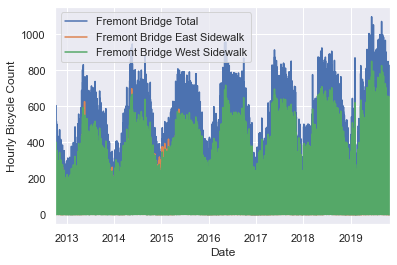

In [7]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

## Resample by week

Text(0, 0.5, 'Weekly bicycle count')

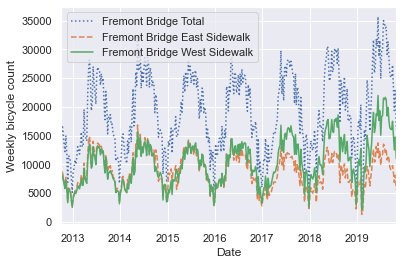

In [8]:
#downgrading samplw
weekly=data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')

## 30 days monthly mean
- Another way to aggregate the data is by rolling mean
- using pd.rolling.mean() funtion

Text(0, 0.5, 'mean hourly count')

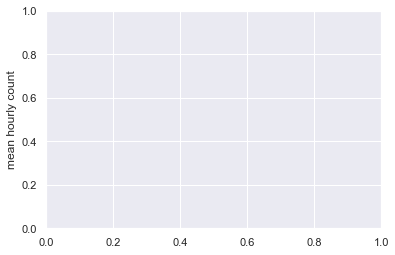

In [11]:
daily=data.resample('D').sum()
#daily.rolling(30, center缺 )
plt.ylabel('mean hourly count')

# Using window function to smooth the version of a rolling mean

<AxesSubplot:xlabel='Date'>

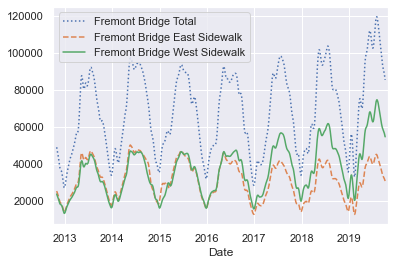

In [13]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

## Hourly Trend

In [18]:
data.index.time

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

<AxesSubplot:xlabel='time'>

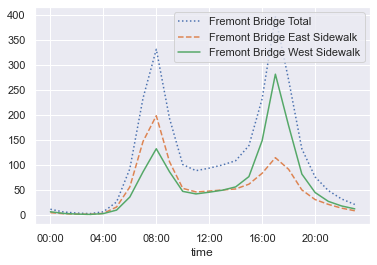

In [22]:
by_time=data.groupby(data.index.time).mean()
hourly_ticks=['00:00', '04:00', '08:00','12:00', '16:00', '20:00'] 
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

## Weekly Trend

<AxesSubplot:>

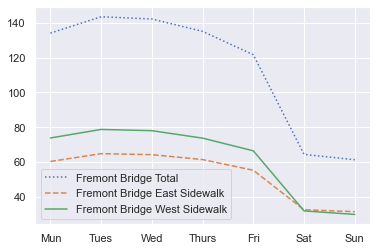

In [19]:
by_weekly=data.groupby(data.index.dayofweek).mean()
by_weekly.index=['Mun', 'Tues','Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekly.plot(style=[':', '--', '-'])

## Hourly Trend on Weekdays vs Weekend

In [24]:
weekend=np.where(data.index.weekday<5, 'Weekday', 'Weekend')
by_time=data.groupby([weekend, data.index.time]).mean()

<AxesSubplot:title={'center':'Weekends'}, xlabel='time'>

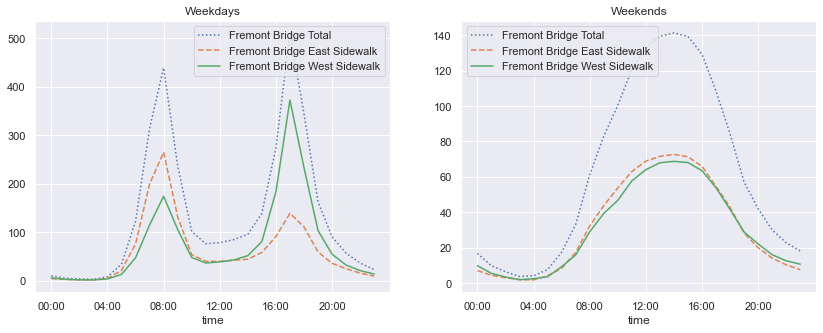

In [29]:
## Plotting the two panels side by sides
fig, ax=plt.subplots(1, 2, figsize=(14, 5))
hourly_ticks=['00:00', '04:00', '08:00','12:00', '16:00', '20:00']
by_time.loc['Weekday'].plot(ax=ax[0], 
                                title='Weekdays', xticks=hourly_ticks, 
                                style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], 
                                title='Weekends', xticks=hourly_ticks, 
                                style=[':', '--', '-'])

## High-Performance Pandas: eval() and query()
- Numpy provide vectorized operation
- Pandas provide efficient grouping-type operation
- Numexpr library gives us the high performance computation and efficient utilization of memory
- eval() and query() functions can be accessed by using pandas or dataframe 

In [32]:
import numexpr
rng=np.random.RandomState(42)
df1, df2, df3, df4, df5 =(pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                        for i in range(5))



**Operations supported by eval()**
- Arithmatic operations
- Comparison operations
- Bitwise operations
- Boolean Expressions
- eval() can access object attributes and indices

In [33]:
result1=-df1*df2/(df3+df4)-df5
result2=pd.eval('-df1*df2/(df3+df4)-df5')
np.allclose(result1, result2)
#Rutern True if two arrays are element wise equal

True

In [34]:
# comparison operation
result1=(df1<df2) & (df2<=df3) & (df3!=df4)
result2=pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

In [35]:
# Bitwise operation
result1=(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2=pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In [39]:
# Boolean Expression
result3=pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

In [40]:
# Object attributes and Indices
result1=df2.T[0]+df3.iloc[1]
result2=pd.eval('df2.T[0]+df3.iloc[1]')
np.allclose(result1, result2)

True

In [43]:
df2.T[0]

0    709
1    415
2    246
Name: 0, dtype: int32

In [44]:
df2.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,709,835,183,766,836,197,510,608,186,348,...,53,992,571,102,876,349,822,655,635,658
1,415,438,122,293,883,981,751,200,325,770,...,443,263,619,195,991,46,935,268,105,656
2,246,202,400,279,609,906,143,123,463,659,...,612,52,4,773,883,866,819,369,669,119


In [46]:
df3

,0,1,2
0,830,786,603
1,57,950,345
2,740,473,116
3,829,790,126
4,392,907,640
...,...,...,...
95,652,753,219
96,637,57,659
97,475,455,828
98,894,360,934


In [45]:
df3.iloc[1]

0     57
1    950
2    345
Name: 1, dtype: int32

# DataFrame.eval() for Column-wise Operation
- Just as Pandas can use pd.eval() function
- The same way DataFrames have an eval()
- The benefit using DataFrame eval() method is that columns can  be referred by name

In [48]:
# Creating DataFrame
df=pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.821257,0.110632,0.846452
1,0.127489,0.397287,0.797295
2,0.149917,0.229251,0.722253
3,0.720037,0.641148,0.693948
4,0.542724,0.251799,0.345696


In [51]:
result1=(df['A']+df['B'])/(df['C']-1)
result2=df.eval('(A+B)/(C-1)')
np.allclose(result1, result2)

True

In [52]:
## Assignment in DataFrame.eval()
df.eval('D=(A+B)/C', inplace=True)
df.head()

,A,B,C,D
0,0.821257,0.110632,0.846452,1.100935
1,0.127489,0.397287,0.797295,0.658195
2,0.149917,0.229251,0.722253,0.524981
3,0.720037,0.641148,0.693948,1.961506
4,0.542724,0.251799,0.345696,2.298330


In [54]:
# Local Variable in DataFrame.eval()
column_mean=df.mean(1)
result1=df['A']+column_mean
result2=df.eval('A+@column_mean')
np.allclose(result1, result2)

True

- Local variable can be accessed in DataFrame eval() and this functionality is not available in pandas eval()

# DataFrame.query() method
- Filter operation

In [55]:
result1=df[(df.A<0.5) & (df.B<0.5)]
result2=df.query('A<0.5 and B<0.5')
np.allclose(result1, result2)

True

`@Flag`

In [56]:
Cmean=df['C'].mean()
result1=df[(df.A<Cmean)& (df.B<Cmean)]
result2=df.query('A<@Cmean and B<@Cmean')
np.allclose(result1, result2)

True